<a href="https://colab.research.google.com/github/invigoro/ArtificialFrameGenerator/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/drive')
%cd drive/Shareddrives/CVProject/Colab

Mounted at /content/drive
/content/drive/Shareddrives/CVProject/Colab


In [ ]:

def mse(image1, image2):
    """
    Compute the Mean Squared Error between two images.
    Lower values indicate higher similarity.
    """
    return np.mean((image1 - image2) ** 2)

def compare_videos_with_graphs(original_video_path, interpolated_video_path):
    """
    Compare two videos frame by frame for both grayscale (SSIM) and color similarity (MSE),
    and plot the results.

    Parameters:
        original_video_path (str): Path to the original video file.
        interpolated_video_path (str): Path to the interpolated video file.
    """
    # Open both video files
    original_cap = cv2.VideoCapture(original_video_path)
    interpolated_cap = cv2.VideoCapture(interpolated_video_path)

    if not original_cap.isOpened():
        print(f"Error: Unable to open original video: {original_video_path}")
        return
    if not interpolated_cap.isOpened():
        print(f"Error: Unable to open interpolated video: {interpolated_video_path}")
        return

    # Get total frame counts
    original_frame_count = int(original_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    interpolated_frame_count = int(interpolated_cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Process frames up to the limit of the shorter video
    frame_limit = min(original_frame_count, interpolated_frame_count)
    print(f"Comparing up to {frame_limit} frames.")

    ssim_scores = []  # List to store SSIM scores
    mse_scores = []   # List to store MSE scores
    frame_indices = list(range(1, frame_limit + 1))

    for frame_idx in range(frame_limit):
        # Read frames from both videos
        ret1, frame1 = original_cap.read()
        ret2, frame2 = interpolated_cap.read()

        if not ret1 or not ret2:
            break

        # Convert frames to grayscale for SSIM
        gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        # Compute SSIM (grayscale comparison)
        ssim_score, _ = compare_ssim(gray1, gray2, full=True)
        ssim_scores.append(ssim_score)

        # Compute MSE (color comparison)
        mse_score = mse(frame1, frame2)
        mse_scores.append(mse_score)

    # Release resources
    original_cap.release()
    interpolated_cap.release()

    # Plot the results
    plt.figure(figsize=(14, 6))

    # Plot SSIM
    plt.subplot(1, 2, 1)
    plt.plot(frame_indices, ssim_scores, label="SSIM", color="blue")
    plt.xlabel("Frame Index")
    plt.ylabel("SSIM")
    plt.title("SSIM per Frame")
    plt.grid(True)
    plt.legend()

    # Plot MSE
    plt.subplot(1, 2, 2)
    plt.plot(frame_indices, mse_scores, label="MSE", color="red")
    plt.xlabel("Frame Index")
    plt.ylabel("MSE")
    plt.title("MSE per Frame")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Comparison complete. Average SSIM: {np.mean(ssim_scores):.4f}, Average MSE: {np.mean(mse_scores):.2f}")

In [ ]:
def print_video_properties(video_path):
    """
    Print the properties of a video: frame rate, duration, and total number of frames.

    Parameters:
        video_path (str): Path to the video file.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Unable to open video file: {video_path}")
        return

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames
    duration = total_frames / fps  # Duration in seconds

    # Print the properties
    print(f"Video Properties for '{video_path}':")
    print(f"  Resolution: {width}x{height}")
    print(f"  Frame Rate (fps): {fps}")
    print(f"  Duration (s): {duration:.2f}")
    print(f"  Total Frames: {total_frames}")

Video Properties for 'Video/Original/a_trip_to_the_moon.mp4':
  Resolution: 640x480
  Frame Rate (fps): 29.97002997002997
  Duration (s): 41.17
  Total Frames: 1234
Video Properties for 'Video/AI_Output/a_trip_to_the_moon_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 640x480
  Frame Rate (fps): 29.0
  Duration (s): 42.52
  Total Frames: 1233
Comparing up to 1233 frames.


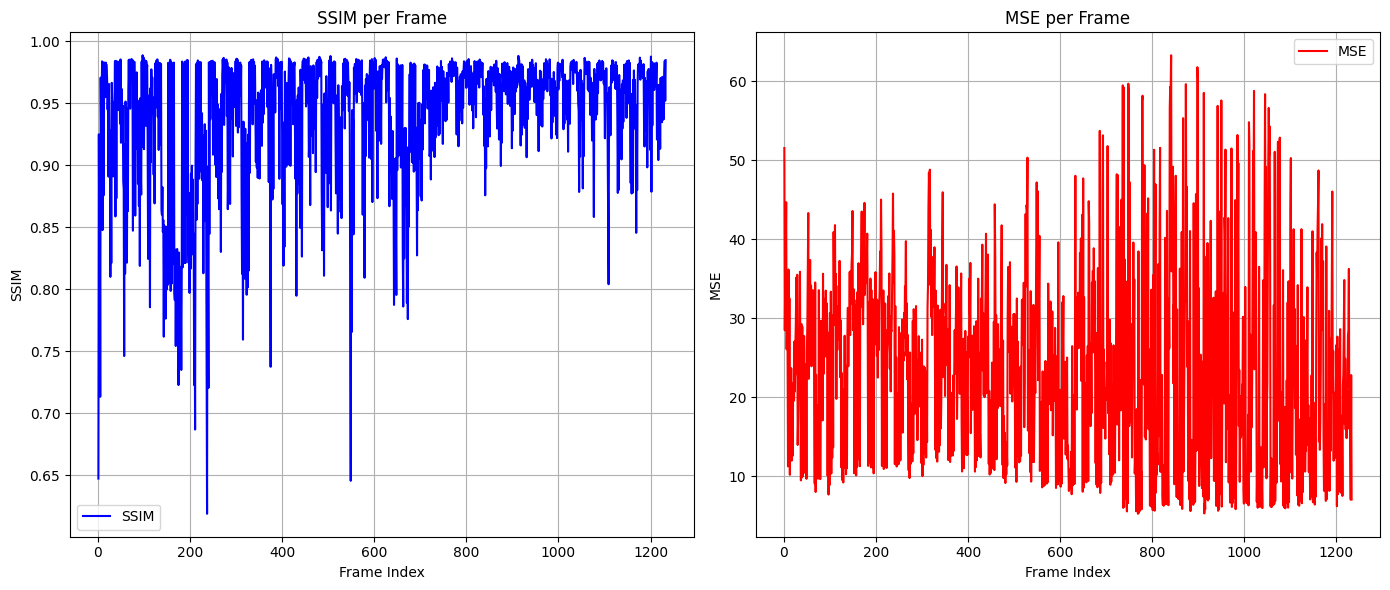

Comparison complete. Average SSIM: 0.9388, Average MSE: 23.16
Video Properties for 'Video/Original/near_miss.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 29.97002997002997
  Duration (s): 14.41
  Total Frames: 432
Video Properties for 'Video/AI_Output/near_miss_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 29.0
  Duration (s): 14.86
  Total Frames: 431
Comparing up to 431 frames.


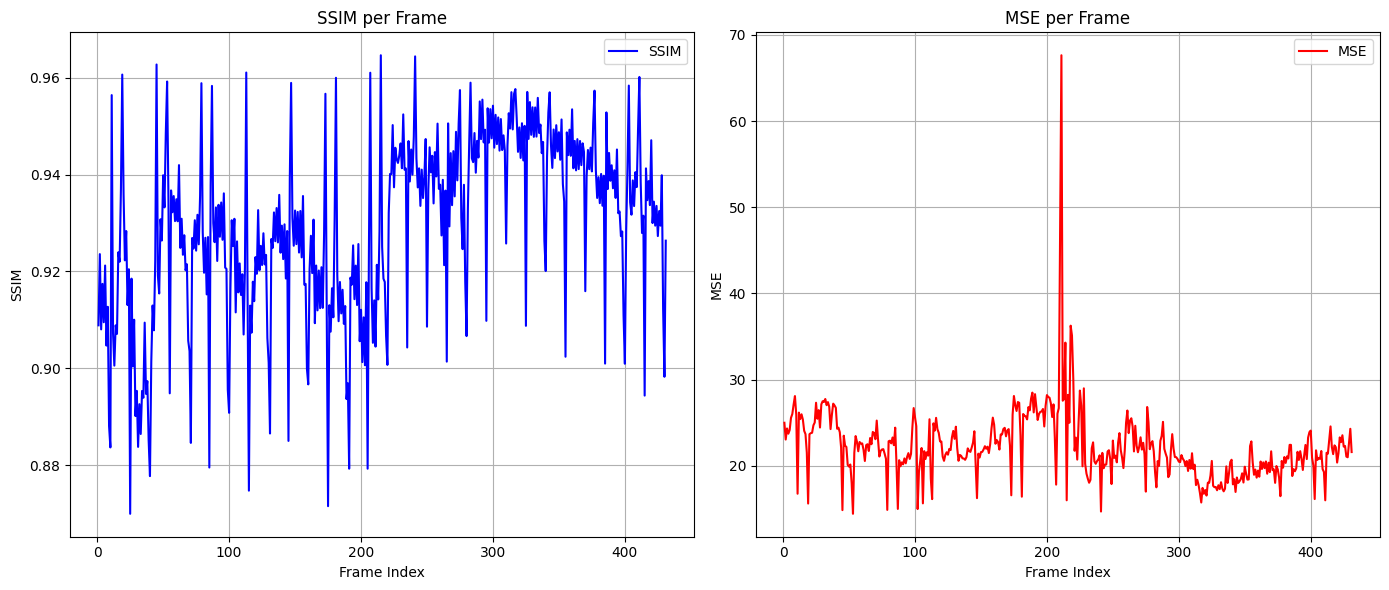

Comparison complete. Average SSIM: 0.9293, Average MSE: 22.22
Video Properties for 'Video/Original/walking_outdoors1.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.007770741934802
  Duration (s): 20.46
  Total Frames: 614
Video Properties for 'Video/AI_Output/walking_outdoors1_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.0
  Duration (s): 20.43
  Total Frames: 613
Comparing up to 613 frames.


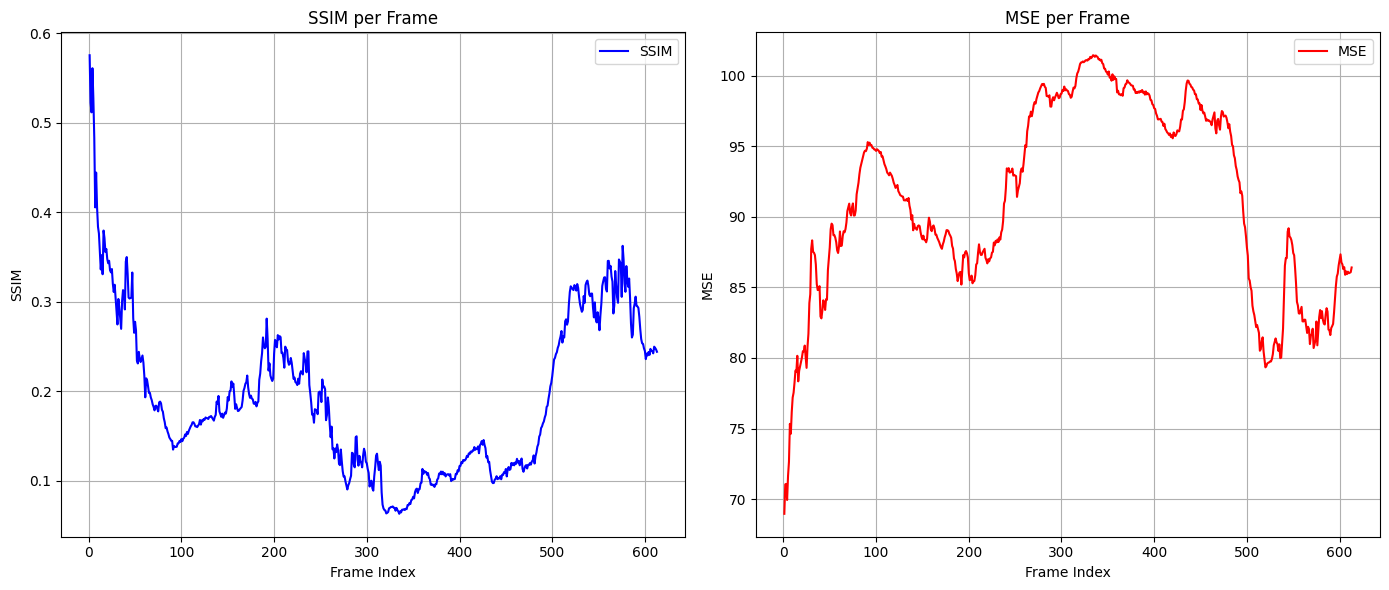

Comparison complete. Average SSIM: 0.1934, Average MSE: 91.20
Video Properties for 'Video/Original/walking_outdoors2.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.00714880563423
  Duration (s): 22.43
  Total Frames: 673
Video Properties for 'Video/AI_Output/walking_outdoors2_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.0
  Duration (s): 22.37
  Total Frames: 671
Comparing up to 671 frames.


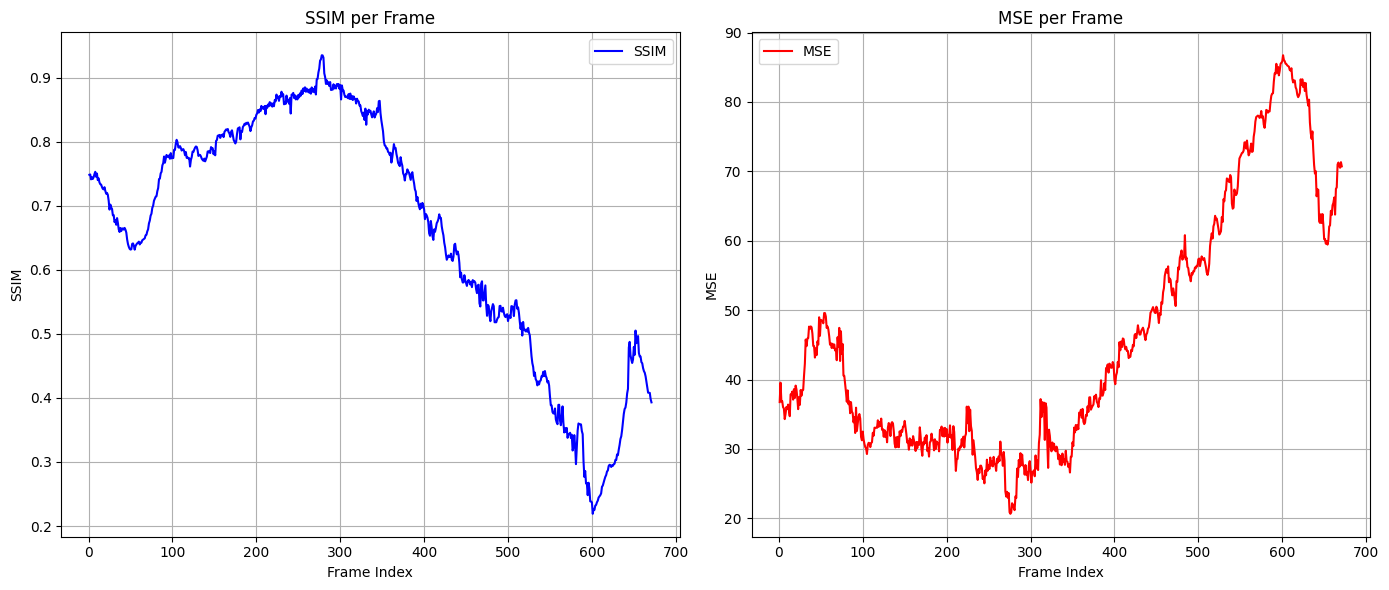

Comparison complete. Average SSIM: 0.6612, Average MSE: 45.83
Video Properties for 'Video/Original/great_train_robbery.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 24.0
  Duration (s): 139.58
  Total Frames: 3350
Video Properties for 'Video/AI_Output/great_train_robbery_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 24.0
  Duration (s): 139.54
  Total Frames: 3349
Comparing up to 3349 frames.


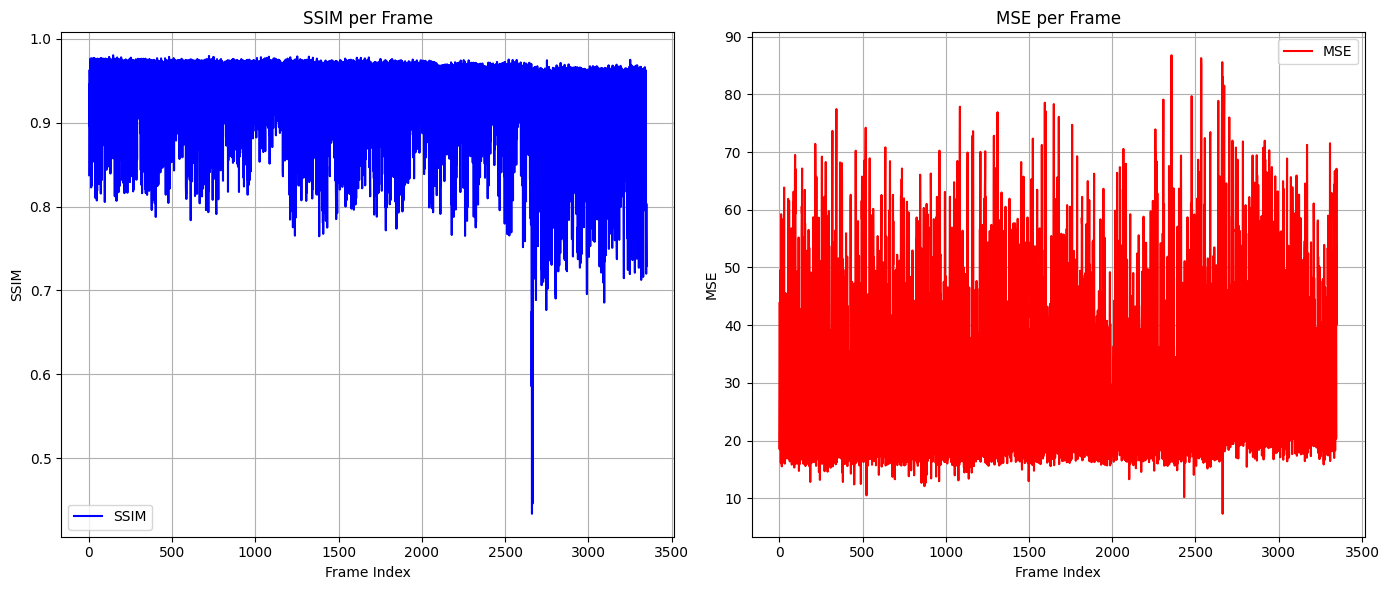

Comparison complete. Average SSIM: 0.9020, Average MSE: 34.51
Video Properties for 'Video/Original/great_auk.mp4':
  Resolution: 464x728
  Frame Rate (fps): 10.0
  Duration (s): 3.60
  Total Frames: 36
Video Properties for 'Video/AI_Output/great_auk_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 464x728
  Frame Rate (fps): 20.0
  Duration (s): 3.50
  Total Frames: 70
Comparing up to 36 frames.


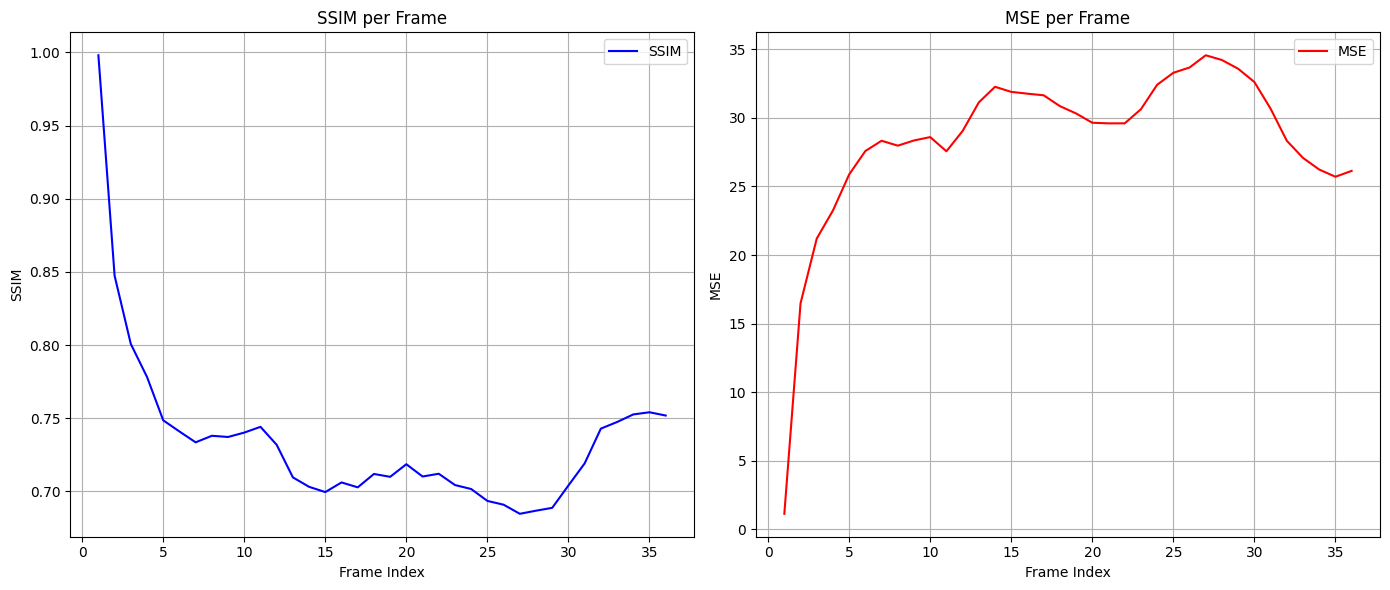

Comparison complete. Average SSIM: 0.7346, Average MSE: 28.43
Video Properties for 'Video/Original/cars.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 25.0
  Duration (s): 60.04
  Total Frames: 1501
Video Properties for 'Video/AI_Output/cars_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 25.0
  Duration (s): 59.92
  Total Frames: 1498
Comparing up to 1498 frames.


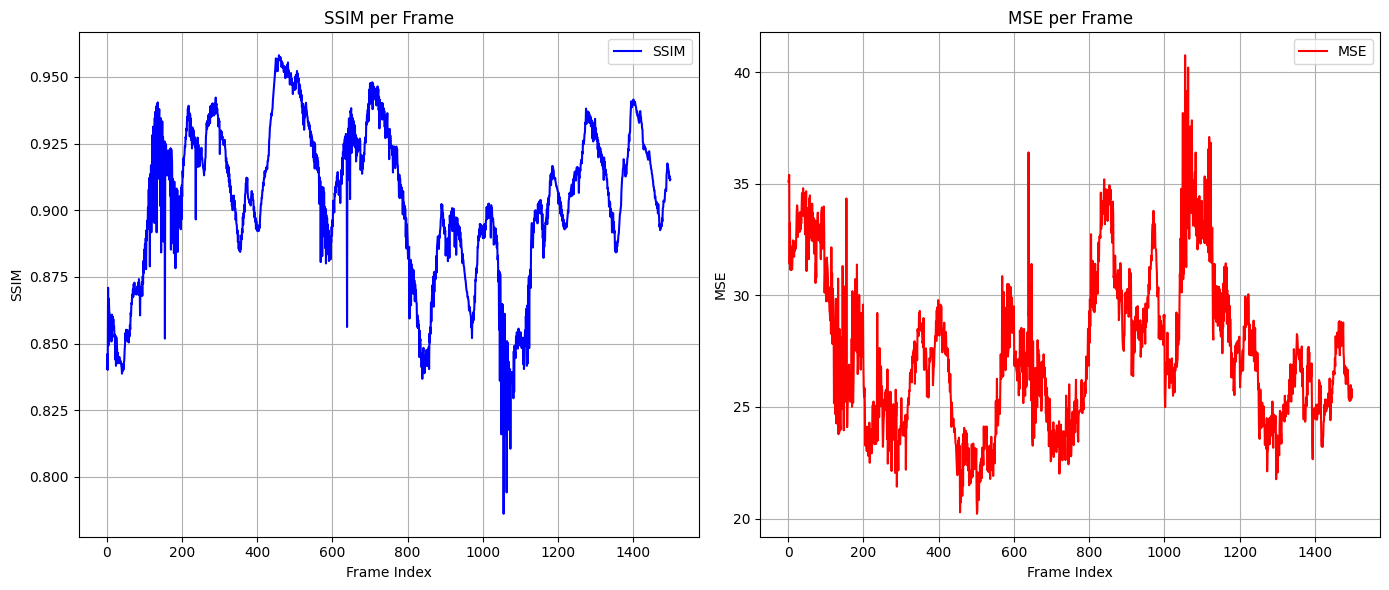

Comparison complete. Average SSIM: 0.9033, Average MSE: 27.44
Video Properties for 'Video/Original/gliderlowq.mp4':
  Resolution: 1280x720
  Frame Rate (fps): 30.0
  Duration (s): 21.77
  Total Frames: 653
Video Properties for 'Video/AI_Output/gliderlowq_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1280x720
  Frame Rate (fps): 30.0
  Duration (s): 21.70
  Total Frames: 651
Comparing up to 651 frames.


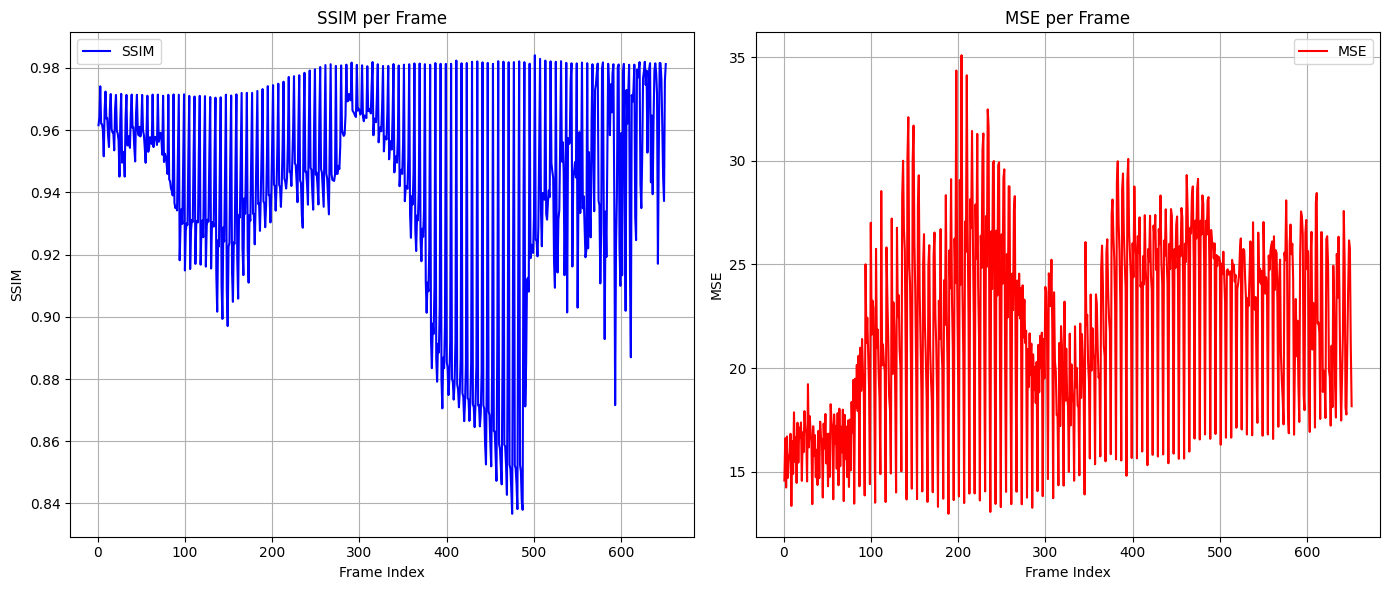

Comparison complete. Average SSIM: 0.9401, Average MSE: 21.77
Video Properties for 'Video/Original/AC_Origins_CV.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.0
  Duration (s): 118.30
  Total Frames: 3549
Video Properties for 'Video/AI_Output/AC_Origins_CV_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.0
  Duration (s): 118.20
  Total Frames: 3546
Comparing up to 3546 frames.


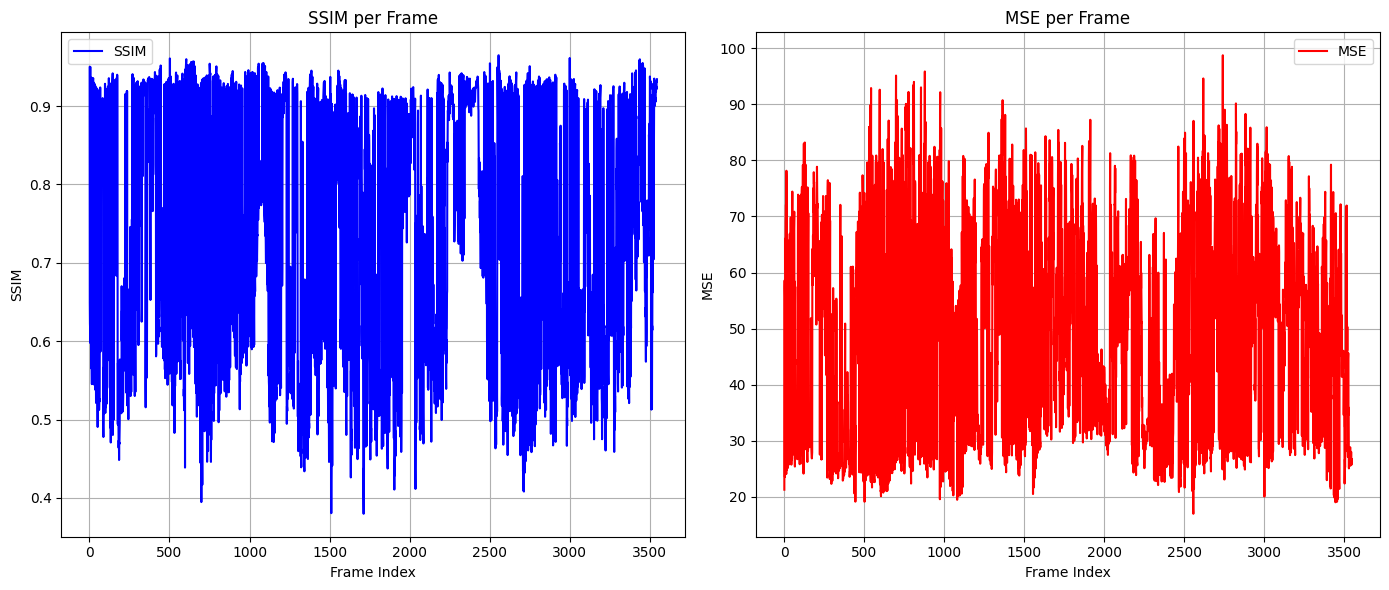

Comparison complete. Average SSIM: 0.7115, Average MSE: 51.30
Video Properties for 'Video/Original/MacbethSwordFight.mp4':
  Resolution: 640x360
  Frame Rate (fps): 30.0
  Duration (s): 53.87
  Total Frames: 1616
Video Properties for 'Video/AI_Output/MacbethSwordFight_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 640x360
  Frame Rate (fps): 30.0
  Duration (s): 53.80
  Total Frames: 1614
Comparing up to 1614 frames.


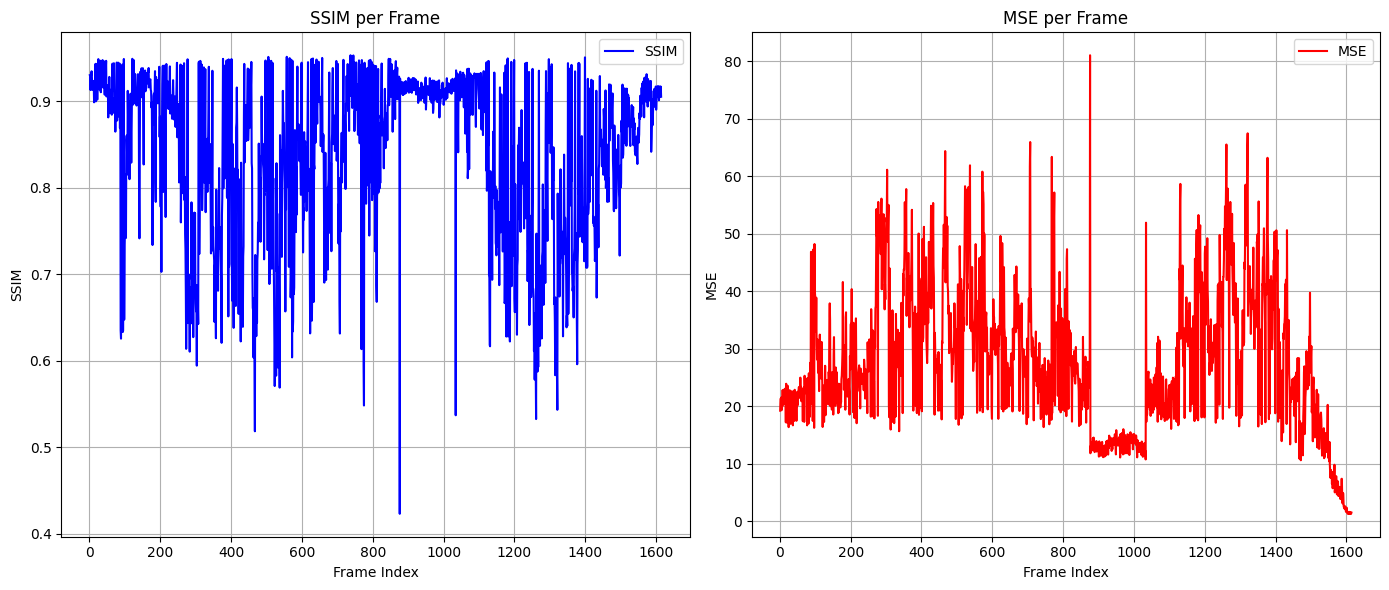

Comparison complete. Average SSIM: 0.8386, Average MSE: 27.88
Video Properties for 'Video/Original/SW_Battlefront_II.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.0
  Duration (s): 444.00
  Total Frames: 13320
Video Properties for 'Video/AI_Output/SW_Battlefront_II_reduced_RIFE_4.17x2_Resize-100.mp4':
  Resolution: 1920x1080
  Frame Rate (fps): 30.0
  Duration (s): 443.97
  Total Frames: 13319
Comparing up to 13319 frames.


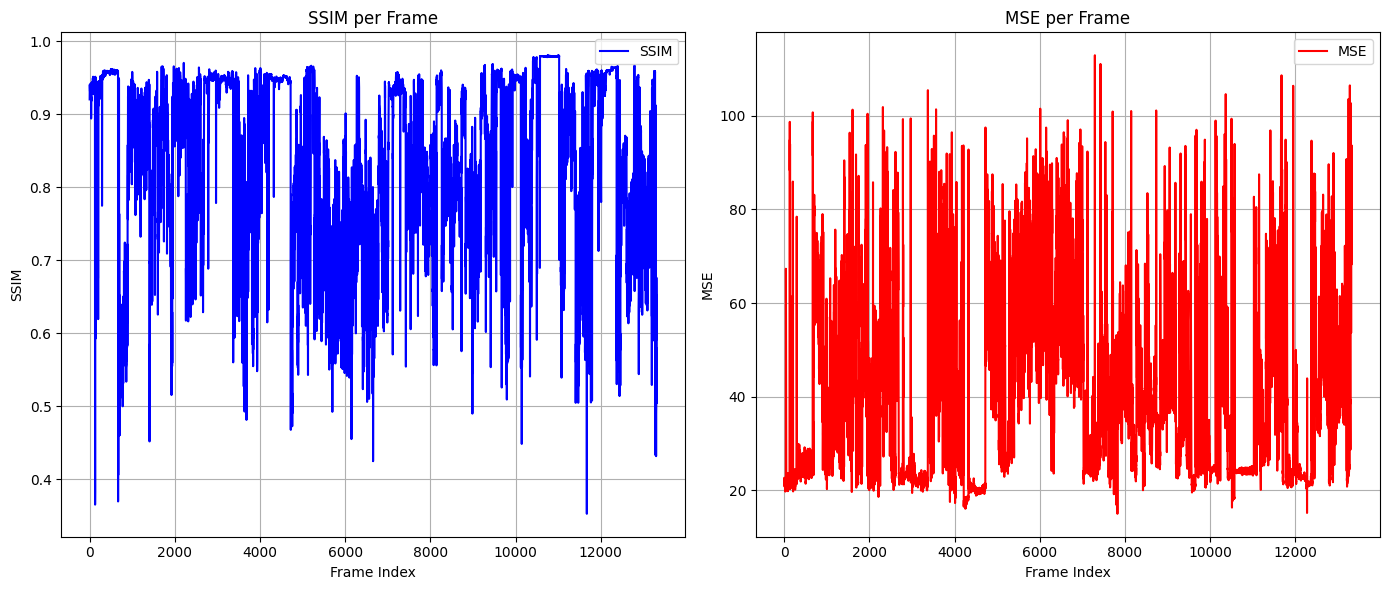

Comparison complete. Average SSIM: 0.8318, Average MSE: 41.91


In [ ]:
video_names = ["a_trip_to_the_moon.mp4",
               "near_miss.mp4",
               "walking_outdoors1.mp4",
               "walking_outdoors2.mp4",
               "great_train_robbery.mp4",
               "great_auk.mp4",
               "cars.mp4",
               "gliderlowq.mp4",
               "AC_Origins_CV.mp4",
               "MacbethSwordFight.mp4",
               "SW_Battlefront_II.mp4"]

video_input_path = "Video/Original/"
video_output_path = "Video/AI_Output/"

for v in video_names:
  pieces = v.split('.')
  filename = pieces[0]
  extension = pieces[1]
  original_name = video_input_path + v
  generated_name = video_output_path + filename + "_reduced_RIFE_4.17x2_Resize-100." + extension

  print_video_properties(original_name)
  print_video_properties(generated_name)

  compare_videos_with_graphs(original_name, generated_name)


In [ ]:
# Paths to the videos
video1 = "gliderlowq.mp4"
video2 = "output_videogliderhalffps.mp4"

print_video_properties(video1)
print_video_properties(video2)

compare_videos_with_graphs(video1, video2)

Error: Unable to open video file: gliderlowq.mp4
Error: Unable to open video file: output_videogliderhalffps.mp4
Error: Unable to open original video: gliderlowq.mp4
